# Ödev-25

In [2]:
# iris.csv veri setini kullanarak kümeleme yapınız. 
# Bulduğunuz kümeleri çiçek türleriyle karşılaştırınız.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('D:/Datasets/iris.csv')

# Veri Keşfi

In [2]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Boş değer yok. Veri türleri uyumlu.

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Aykırı değer görünmüyor.

In [7]:
df.groupby(['Species']).SepalLengthCm.agg(['count']).head()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Analize girecek nitelikleri seçmek

In [8]:
X = df.iloc[:,:-1].values

In [10]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

# Standardizasyon (Feature Scaling)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X[:3]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673]])

# İdeal k sayısını bulmak

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    For döngüsü içinde yer alan kodlar neler yapıyor? 
    For döngüsü i değişkeniyle her dönüşünde bir artarak küme sayısını parametre olarak n_clusters’a veriyor. 
    init parametresi ise başlangıç noktalarını seçmek için ideal küme merkezlerini belirliyor, başlangıç noktası tuzağından (random initialization trap) kurtulmak için. kmeans++ parametresi bizi bu tuzaktan kurtaracak iyi başlangıç noktaları seçmemizi sağlıyor. 
    max_iter, algoritmanın nihai durumuna erişmesi için en fazla kaç iterasyon yapabileceğini belirler, varsayılan 300’tür.
    n_init ise küme merkezi başlangıç noktasının kaç farklı noktadan başlayabileceğini belirler. 
    random_state, bu işlemleri uygulayan herkesin aynı sonuçları elde etmesini sağlar. 
    fit() metodu ile model eğitimi gerçekleşir. Parametre olarak daha önce oluşturduğumuz X’i (feature matrix) veriyoruz. 
    for döngüsünden önce oluşturduğumuz wcss listesine kmeans nesnesinin inerita_ özelliğini ekliyoruz. inertia_ Within Clusters Sum of Square (WCSS)  Kümeler içi kareler toplamı.

# Dirsek Metodu (Elbow Method) ile optimal küme sayısı

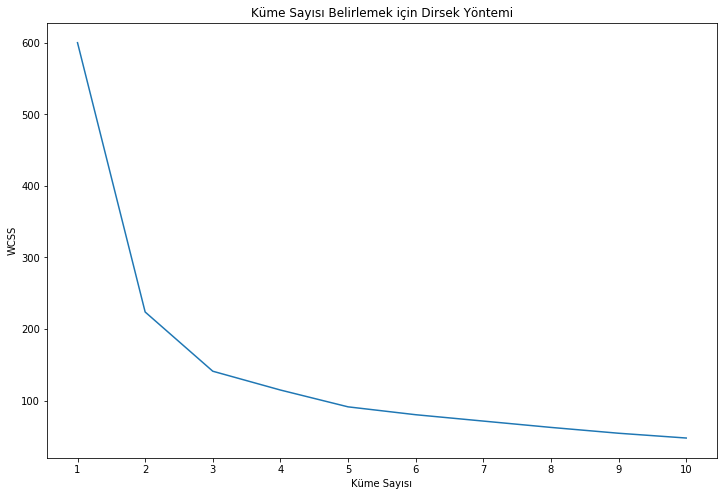

In [15]:
plt.figure(figsize=(12,8))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.xticks(kume_sayisi_listesi)
plt.ylabel('WCSS')
plt.show()

# Belirlenen küme sayısına göre kümeleme yapmak

In [16]:
# Dirsek yöntemine göre optimal k sayısı 5 görünüyor.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [17]:
# kmeans nesnesini eğitip hengi müşterinin hangi kümeye dahil olduğunu bulalım.
y_kmeans = kmeans.fit_predict(X)
y_kmeans[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Kim hangi kümede?

In [18]:
# Kimin hangi kümeye düştüğü indeks diziliminden anlaşılır.
# küme merkezlerini (rakam, koordinat değil) dataframe'e ekleyelim.
df['clusters'] = y_kmeans

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


# Gerçek sınıflarla kümeleri karşılaştırma

In [20]:
df.groupby(['Species','clusters']).count() \
.reset_index() \
.sort_values('clusters')

,Species,clusters,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,Iris-versicolor,0,39,39,39,39
3,Iris-virginica,0,14,14,14,14
0,Iris-setosa,1,50,50,50,50
2,Iris-versicolor,2,11,11,11,11
4,Iris-virginica,2,36,36,36,36


In [20]:
125/150

0.8333333333333334